In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5979301160517592902, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11153436864
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14654991321084975388
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

# imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install --upgrade geopandas
# !pip install --upgrade pyshp
!pip install --upgrade shapely

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

Requirement already up-to-date: geopandas in /usr/local/lib/python3.6/dist-packages (0.8.2)
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.1)


In [4]:
import scipy.io as scio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, mean_squared_error, mean_absolute_error

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential,activations
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D,Conv2D,MaxPooling1D,MaxPooling2D,GlobalMaxPooling2D,AveragePooling2D,Activation,Input,Add,Dense,ZeroPadding2D,Flatten
from tensorflow.keras.optimizers import Adam
from keras.initializers import glorot_uniform
from keras.models import Model,load_model
from keras import metrics
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def mySigmoid(x):
  output = K.sigmoid(x)*16
  output._keras_logits = x
  return output

get_custom_objects().update({'mySigmoid': mySigmoid})

# cycle_102

In [ ]:

path = "/content/drive/My Drive/Colab Notebooks/data/JA3_GPS_2PdP125_102_20190704_220345_20190704_225958.mat"
data = scio.loadmat(path)
data = data["inputs"]
data.shape

(8, 67760)

In [ ]:
data_origin = data

In [ ]:
# df_data = pd.DataFrame(data)
# datapath = "/content/drive/My Drive/Colab Notebooks/df_data.csv"
# df_data.to_csv(datapath)

In [ ]:
# iii = [0, 1, 2]
# dff = df_data
# print(dff.iloc[:,iii])
# dff = dff.drop(iii,axis=1)
# print(dff.iloc[:,iii])
# print(dff.iloc[:,[0, 1, 2]])

In [ ]:
# tobeDeleted = np.where(data[6,:]==0)
# data = np.delete(data, tobeDeleted, axis=1)

# delete continent data and preserve continuouos 16 pixels data

data_cycle102 = np.zeros((8,16))

i=0

while i<=data.shape[1]:
  cur = data[:,i:i+16]
  if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16:
    data_cycle102 = np.hstack((data_cycle102,cur))
  i = i + 16

data_cycle102 = data_cycle102[:,16:]
print(data_cycle102.shape)

(8, 11920)


In [ ]:
# data = np.append(data, [[2.76297243e+02], [2.98792150e+01], [1.22377620e+01], [-3.59318308e-03], [2.49900000e+00], [0], [1.00000000e+00], [1.00000000e+00]], axis=1)
print(data_cycle102[:,0])
print(data_cycle102[:,-1])
print(data_cycle102.shape)

[2.76308500e+02 2.98575280e+01 1.57863862e+01 8.56605412e-03
 2.90200000e+00 2.52000005e-02 1.00000000e+00 1.00000000e+00]
[ 3.28741863e+02 -5.82946080e+01  1.55545082e+01  1.09203315e-02
  1.14800000e+00  9.62999999e-02  1.00000000e+00  1.00000000e+00]
(8, 11920)


In [ ]:
data_copy = data_cycle102
data_6v = data_cycle102[2:,:]
print(data_6v.shape)

(6, 11920)


In [ ]:
data_6v[np.isnan(data_6v)]=0
print("data_6v.shape:",data_6v.shape)

X = np.zeros((1,16,16))
Z = np.zeros((10,16))

# scaler = StandardScaler()

# for i in range(140):
for i in range(int(data_6v.shape[1]/16)):
  temp = data_6v[:,0:16]
  # print("temp.shape",temp.shape)
  temp = np.vstack((temp,Z))
  # print("temp.shape",temp.shape)
  # temp = scaler.fit_transform(temp)
  temp = temp.reshape(1,16,16)
  X = np.vstack((X,temp))
  # print("X.shape",X.shape)
  data_6v = data_6v[:,16:]
# data_6v.shape

X = X[1:,:]
X.shape

data_6v.shape: (6, 11920)


(745, 16, 16)

In [ ]:
X[0]

array([[ 1.57863862e+01,  1.60487956e+01,  1.62209424e+01,
         1.63351015e+01,  1.64418045e+01,  1.65553954e+01,
         1.66768923e+01,  1.68079018e+01,  1.69470050e+01,
         1.70942078e+01,  1.72548906e+01,  1.74302145e+01,
         1.76161658e+01,  1.78068954e+01,  1.79979755e+01,
         1.81934595e+01],
       [ 8.56605412e-03,  9.42543794e-03,  9.92723723e-03,
         1.01807648e-02,  1.03773136e-02,  1.05713713e-02,
         1.07644254e-02,  1.09655407e-02,  1.11799915e-02,
         1.14092789e-02,  1.16588027e-02,  1.19265487e-02,
         1.21984628e-02,  1.24573185e-02,  1.26986247e-02,
         1.29348338e-02],
       [ 2.90200000e+00,  1.06000000e-01,  1.44400000e+00,
         7.00000000e-03,  7.00000000e-03,  1.73200000e+00,
         2.65600000e+00,  3.80000000e-02,  2.63300000e+00,
         1.22500000e+00,  6.02000000e-01,  5.33000000e-01,
         7.00000000e-03,  7.00000000e-03,  4.44000000e-01,
         7.00000000e-03],
       [ 2.52000005e-02,  1.93300000e

In [ ]:
model = load_model("/content/drive/My Drive/Colab Notebooks/CNN.h5")
X = X.reshape(X.shape[0],16,16,1)
y = model.predict(X)
y.shape

(745, 1)

In [ ]:
print("max:",np.max(y))
print("min:",np.min(y))
print("non zero:",np.count_nonzero(y))

y_pred = np.around(y)
y_pred = y_pred.astype(int)
# print(y_pred)
# print(np.count_nonzero(y_pred))

for i in range(len(y_pred)):
  if y_pred[i]>16:
    # y_pred[i]=16
    y_pred[i]=0
  if y_pred[i]<0:
    y_pred[i]=0

print("max:",np.max(y_pred))
print("min:",np.min(y_pred))
print("non zero:",np.count_nonzero(y_pred))

max: 0.57322127
min: -0.4527505
non zero: 745
max: 1
min: 0
non zero: 1


In [ ]:
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_pred.txt",y_pred)

In [ ]:
y_pred = y_pred.reshape(1,-1)
y_pred = y_pred[0]
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(data.shape)

(8, 67760)


In [ ]:
location = []

for i in range(len(y_pred)):
  if y_pred[i]!=0:
    x = data[0,i*16+y_pred[i]-1]
    y = data[1,i*16+y_pred[i]-1]
    print(x,y)
    location.append((x,y))
    print(i,y_pred[i])
    print("\n")
# print(location)

nan nan
169 1




In [ ]:
dfdata = pd.DataFrame(data)
datapath1 = "/content/drive/My Drive/Colab Notebooks/dfdata.csv"
dfdata.to_csv(datapath1)

In [ ]:
loc = []

for i in location:
  # print(i)
  # break
  if i[0]>180:
    a = i[0]-360
    b = i[1]  
  else:
    a = i[0]
  loc.append((a,b))

print(len(loc))
print(loc)

1
[(nan, 1.582285)]


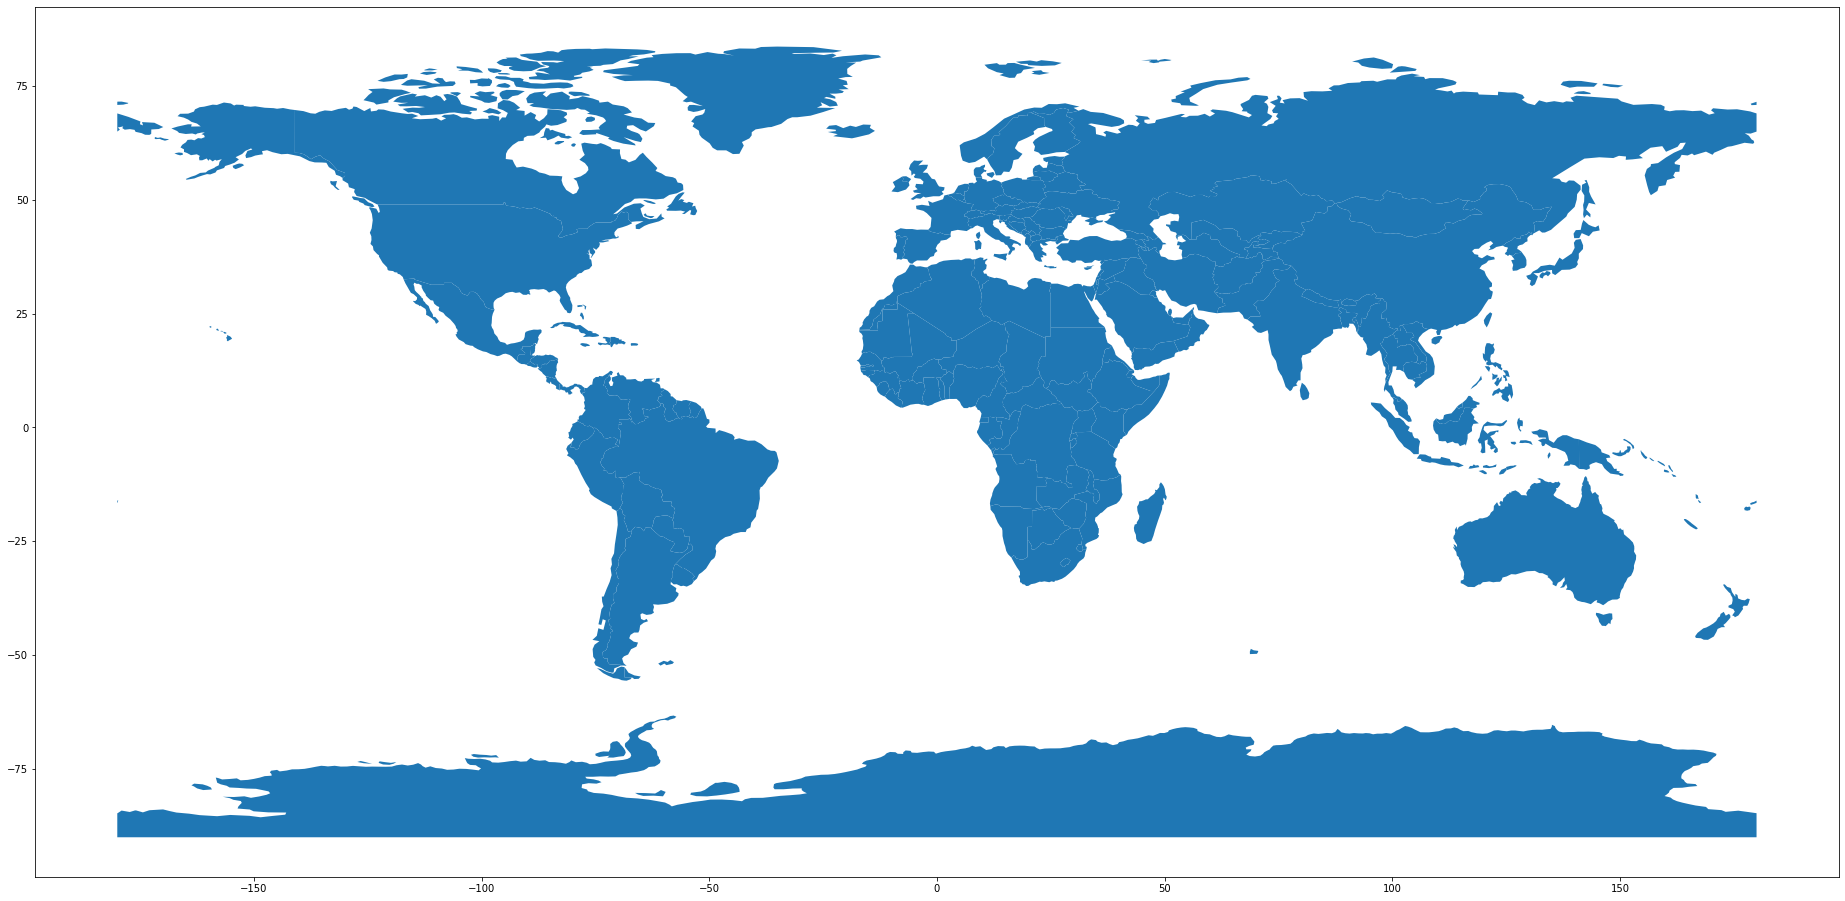

In [ ]:
df = pd.DataFrame(loc, columns=['longitude','latitude'])

df.to_csv("/content/drive/My Drive/Colab Notebooks/location.csv")

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/location.csv")

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(36, 16)), marker='o', color='red', markersize=1)



# Regional data - 70E-180E

In [ ]:
data_part = np.load("/content/drive/MyDrive/Colab Notebooks/data/data_globe_3360240.npz")
data_part = data_part["arr_0"]
print(data_part.shape)
# data_part

(8, 1553216)


In [ ]:
data_part = data_part[:,16:]
print(data_part.shape)

(8, 1553200)


In [ ]:
# East asia data

i=0

data_region = np.zeros((8,16))

while i<=data_part.shape[1]:
  print(i)
  cur = data_part[:,i:i+16]
  if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16 and 90<=cur[0,0]<=135 and 0<=cur[1,0]:
    data_region = np.hstack((data_region,cur))
  i = i + 16

print(data_region.shape)

流式输出内容被截断，只能显示最后 5000 行内容。
1473232
1473248
1473264
1473280
1473296
1473312
1473328
1473344
1473360
1473376
1473392
1473408
1473424
1473440
1473456
1473472
1473488
1473504
1473520
1473536
1473552
1473568
1473584
1473600
1473616
1473632
1473648
1473664
1473680
1473696
1473712
1473728
1473744
1473760
1473776
1473792
1473808
1473824
1473840
1473856
1473872
1473888
1473904
1473920
1473936
1473952
1473968
1473984
1474000
1474016
1474032
1474048
1474064
1474080
1474096
1474112
1474128
1474144
1474160
1474176
1474192
1474208
1474224
1474240
1474256
1474272
1474288
1474304
1474320
1474336
1474352
1474368
1474384
1474400
1474416
1474432
1474448
1474464
1474480
1474496
1474512
1474528
1474544
1474560
1474576
1474592
1474608
1474624
1474640
1474656
1474672
1474688
1474704
1474720
1474736
1474752
1474768
1474784
1474800
1474816
1474832
1474848
1474864
1474880
1474896
1474912
1474928
1474944
1474960
1474976
1474992
1475008
1475024
1475040
1475056
1475072
1475088
1475104
1475120
1475136
1475152
14751

In [ ]:
data_region = data_region[:, 16:]
data_region_6v = data_region[2:,:]
print(data_region_6v.shape)

data_region_6v[np.isnan(data_region_6v)]=0
print("data_region_6v.shape:",data_region_6v.shape)

X = np.zeros((1,16,16))
Z = np.zeros((10,16))

scaler = StandardScaler()

for i in range(int(data_region_6v.shape[1]/16)):
  temp = data_region_6v[:,0:16]
  # print("temp.shape",temp.shape)
  temp = np.vstack((temp,Z))
  # print("temp.shape",temp.shape)
  temp = scaler.fit_transform(temp)
  temp = temp.reshape(1,16,16)
  X = np.vstack((X,temp))
  # print("X.shape",X.shape)
  data_region_6v = data_region_6v[:,16:]
# data_region_6v.shape

X = X[1:,:]
X.shape

(6, 33840)
data_region_6v.shape: (6, 33840)


(2115, 16, 16)

In [ ]:
model = load_model("/content/drive/My Drive/Colab Notebooks/CNN.h5")
X = X.reshape(X.shape[0],16,16,1)
y = model.predict(X)
y.shape

(2115, 1)

In [ ]:
print("max:",np.max(y))
print("min:",np.min(y))
print("non zero:",np.count_nonzero(y))

y_pred = np.around(y)
y_pred = y_pred.astype(int)
# print(y_pred)
# print(np.count_nonzero(y_pred))

for i in range(len(y_pred)):
  if y_pred[i]>16:
    # y_pred[i]=16
    y_pred[i]=0
  if y_pred[i]<0:
    y_pred[i]=0

print("max:",np.max(y_pred))
print("min:",np.min(y_pred))
print("non zero:",np.count_nonzero(y_pred))

max: 12.497901
min: -1.071155
non zero: 2115
max: 12
min: 0
non zero: 279


In [ ]:
y_pred = y_pred.reshape(1,-1)
y_pred = y_pred[0]
print(y_pred)

location = []

for i in range(len(y_pred)):
  if y_pred[i]!=0:
    x = data_region[0,i*16+y_pred[i]-1]
    y = data_region[1,i*16+y_pred[i]-1]
    # print(x,y)
    location.append((x,y))
    # print(i,y_pred[i])
    # print("\n")
# print(location)

# dfdata = pd.DataFrame(data_region)
# datapath1 = "/content/drive/My Drive/Colab Notebooks/dfdata.csv"
# dfdata.to_csv(datapath1)

loc = []

for i in location:
  # print(i)
  # break
  if i[0]>180:
    a = i[0]-360 
  else:
    a = i[0]
  b = i[1] 
  loc.append((a,b))

print(len(loc))
print(loc)

[1 0 9 ... 0 0 0]
279
[(100.76738999999999, 2.378147), (100.80308699999999, 2.478053), (100.812012, 2.5030289999999997), (100.910218, 2.77776), (100.988823, 2.9975359999999998), (101.08176999999999, 3.2572579999999998), (101.096969, 3.299711), (102.187102, 6.328341), (102.21241599999999, 6.398194999999999), (102.284787, 6.597766999999999), (102.37263399999999, 6.8397239999999995), (102.41342399999999, 6.951962), (102.72059499999999, 7.7948059999999995), (102.80081, 8.014185), (103.010971, 8.587437), (103.188839, 9.070813), (103.202615, 9.108182), (103.290869, 9.34732), (106.618095, 17.969296999999997), (106.727886, 18.238453), (106.87863, 18.60622), (106.97107799999999, 18.830735), (107.173261, 19.318986), (107.20607199999999, 19.397862), (107.21633399999999, 19.422508999999998), (107.28312299999999, 19.582691), (107.315032, 19.659072), (131.84484, 42.945295), (131.90169799999998, 42.875062), (131.925498, 42.845597999999995), (132.313708, 42.359687), (132.331685, 42.33694), (132.365801

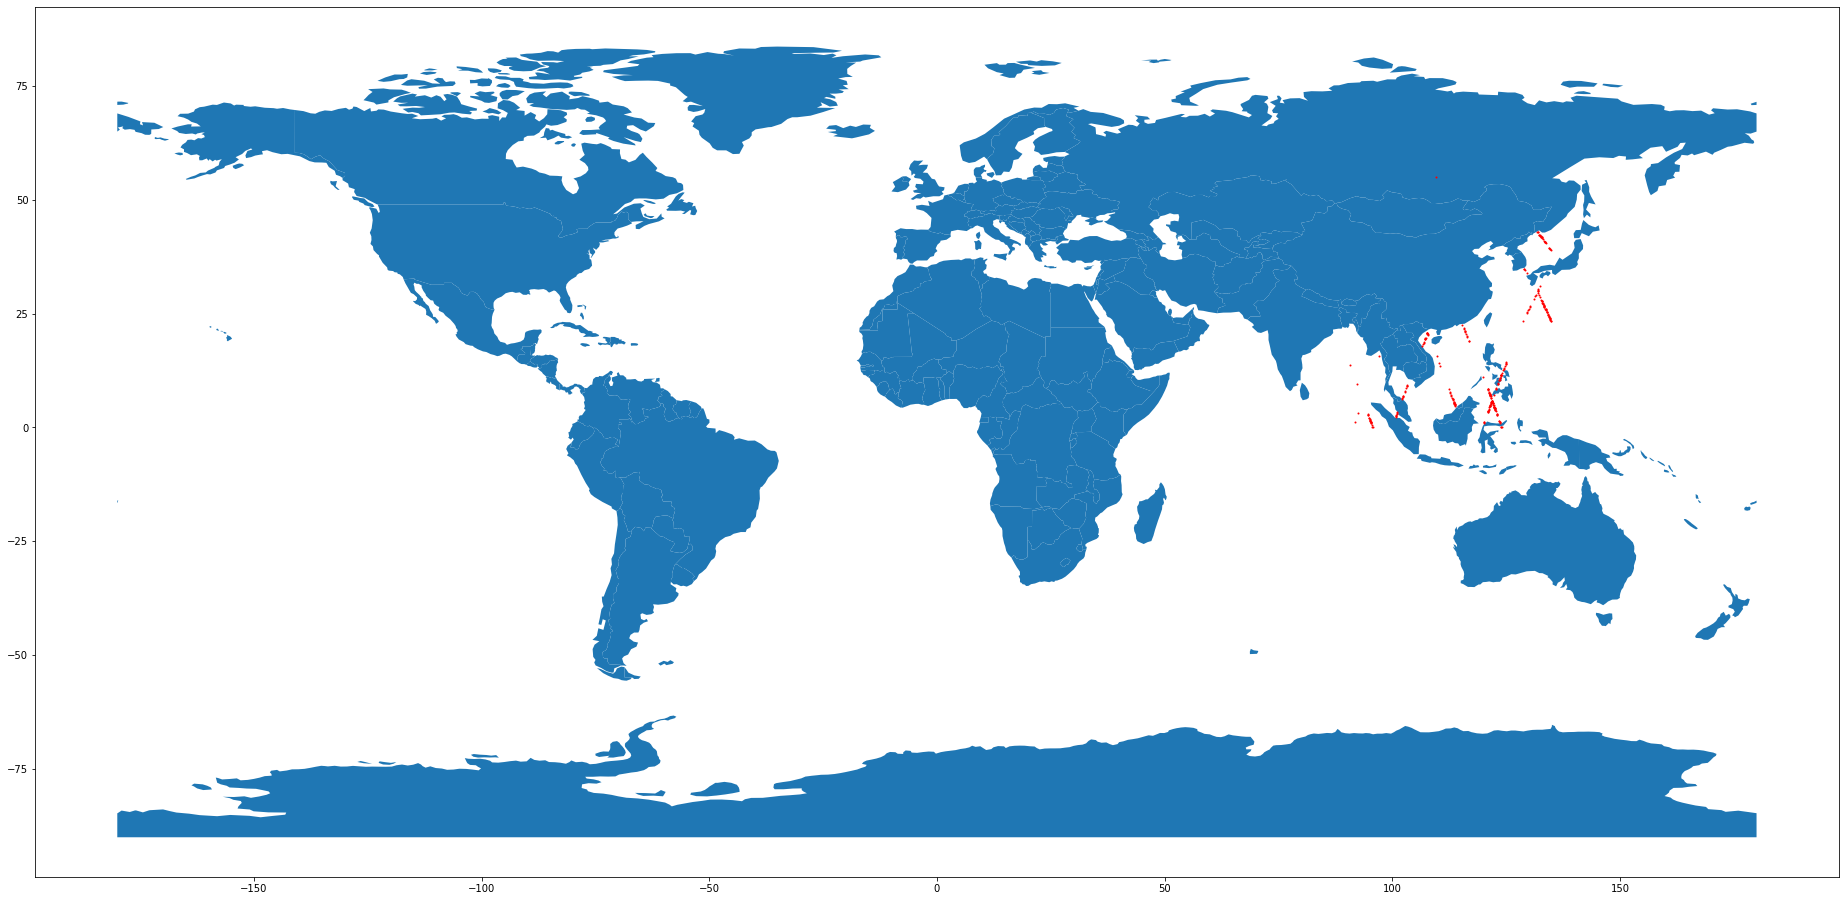

In [ ]:
df = pd.DataFrame(loc, columns=['longitude','latitude'])

df.to_csv("/content/drive/My Drive/Colab Notebooks/location_region.csv")

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/location_region.csv")

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(36, 16)), marker='o', color='red', markersize=1)



# West Pacific - 120E-150E 20N-60N

In [ ]:
def get_WP_data(inputspath):
  inputfilenames = os.listdir(inputspath)
  data_WP = np.zeros((8,16))
  cnt = 1
  for files in inputfilenames:
    print("No.{}".format(cnt))
    cnt=cnt+1
    readpath = inputspath + files
    intemp = scio.loadmat(readpath)
    intemp1 = intemp['inputs']
    # np.nan_to_num(intemp1) #去除nan
    intemp1[np.isnan(intemp1)]=0

    i=0
    while i<=intemp1.shape[1]:
      cur = intemp1[:,i:i+16]
      if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16 and 120<=cur[0,0]<=150 and 20<=cur[1,0]<=60:
        data_WP = np.hstack((data_WP,cur))
      i=i+16

  return data_WP

# while i<=data_part.shape[1]:
#   print(i)
#   cur = data_part[:,i:i+16]
#   if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16 and 90<=cur[0,0]<=135 and 0<=cur[1,0]:
#     data_region = np.hstack((data_region,cur))
#   i = i + 16


path_WP = "/content/drive/My Drive/Colab Notebooks/125_GenSample/"
data_WP = get_WP_data(path_WP)
print(data_WP.shape)

No.1
No.2
No.3
No.4
No.5
No.6
No.7
No.8
No.9
No.10
No.11
No.12
No.13
No.14
No.15
No.16
No.17
No.18
No.19
No.20
No.21
No.22
No.23
No.24
No.25
No.26
No.27
No.28
No.29
No.30
No.31
No.32
No.33
No.34
No.35
No.36
No.37
No.38
No.39
No.40
No.41
No.42
No.43
No.44
No.45
No.46
No.47
No.48
No.49
No.50
No.51
No.52
No.53
No.54
No.55
No.56
No.57
No.58
No.59
No.60
No.61
No.62
No.63
No.64
No.65
No.66
No.67
No.68
No.69
No.70
No.71
No.72
No.73
No.74
No.75
No.76
No.77
No.78
No.79
No.80
No.81
No.82
No.83
No.84
No.85
No.86
No.87
No.88
No.89
No.90
No.91
No.92
No.93
No.94
No.95
No.96
No.97
No.98
No.99
No.100
No.101
No.102
No.103
No.104
No.105
No.106
No.107
No.108
No.109
No.110
No.111
No.112
No.113
No.114
No.115
No.116
No.117
No.118
No.119
No.120
No.121
No.122
No.123
No.124
No.125
No.126
No.127
No.128
No.129
No.130
No.131
No.132
No.133
No.134
No.135
No.136
No.137
No.138
No.139
No.140
No.141
No.142
No.143
No.144
No.145
No.146
No.147
No.148
No.149
No.150
No.151
No.152
No.153
No.154
No.155
No.156
No.157
No.158
No

In [ ]:
data_WP_copy = data_WP
print("data_WP:",data_WP.shape)

data_WP: (8, 156064)


In [ ]:
print("data_WP:",data_WP.shape)
np.savez("/content/drive/My Drive/Colab Notebooks/data_WP.npz",data_WP)

data_WP = np.load("/content/drive/My Drive/Colab Notebooks/data_WP.npz")
data_WP = data_WP["arr_0"]
print("data_WP:",data_WP.shape)

data_WP = data_WP[:, 16:]
data_WP_6v = data_WP[2:,:]
print("data_WP_6v:",data_WP_6v.shape)

data_WP_6v[np.isnan(data_WP_6v)]=0
print("data_WP_6v.shape:",data_WP_6v.shape)

X = np.zeros((1,16,16))
Z = np.zeros((10,16))
scaler = StandardScaler()

for i in range(int(data_WP_6v.shape[1]/16)):
  temp = data_WP_6v[:,0:16]
  # print("temp.shape",temp.shape)
  temp = np.vstack((temp,Z))
  # print("temp.shape",temp.shape)
  temp = scaler.fit_transform(temp)
  temp = temp.reshape(1,16,16)
  X = np.vstack((X,temp))
  # print("X.shape",X.shape)
  data_WP_6v = data_WP_6v[:,16:]
# data_WP_6v.shape

X = X[1:,:]
X.shape

data_WP: (8, 156064)
data_WP: (8, 156064)
data_WP_6v: (6, 156048)
data_WP_6v.shape: (6, 156048)


(9753, 16, 16)

In [ ]:
model = load_model("/content/drive/My Drive/Colab Notebooks/CNN.h5")
X = X.reshape(X.shape[0],16,16,1)
y = model.predict(X)
y.shape

(9753, 1)

In [ ]:
def inspect_y(y):
  print("max:",np.max(y))
  print("min:",np.min(y))
  print("non zero:",np.count_nonzero(y))

  y_pred = np.around(y)
  y_pred = y_pred.astype(int)
  # print(y_pred)
  # print(np.count_nonzero(y_pred))

  for i in range(len(y_pred)):
    if y_pred[i]>16:
      # y_pred[i]=16
      y_pred[i]=0
    if y_pred[i]<0:
      y_pred[i]=0

  print("max:",np.max(y_pred))
  print("min:",np.min(y_pred))
  print("non zero:",np.count_nonzero(y_pred))

  y_pred = y_pred.reshape(1,-1)
  y_pred = y_pred[0]

  return y_pred

y_pred_WP = inspect_y(y)
print("y_pred_WP:",y_pred_WP.shape)
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_pred_WP.txt",y_pred)

max: 16.013348
min: -1.0757512
non zero: 9753
max: 16
min: 0
non zero: 2073
y_pred_WP: (9753,)


In [ ]:
def visualize(y_pred,data_WP):
  location = []
  for i in range(len(y_pred)):
    if y_pred[i]!=0:
      x = data_WP[0,i*16+y_pred[i]-1]
      y = data_WP[1,i*16+y_pred[i]-1]

      if x>180:
        x = x-360 
      else:
        x = x
      x=x[0]
      y=y[0]
      print(x,y)
      location.append((x,y))

  df = pd.DataFrame(location, columns=['longitude','latitude'])

  df.to_csv("/content/drive/My Drive/Colab Notebooks/location_WP.csv")

  df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/location_WP.csv")

  geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
  gdf = GeoDataFrame(df, geometry=geometry)   

  #this is a simple map that goes with geopandas
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  gdf.plot(ax=world.plot(figsize=(360, 160)), marker='o', color='red', markersize=1)

visualize(y_pred,data_WP)

Output hidden; open in https://colab.research.google.com to view.

# All data

## Divide and concatenate 1 cycle

### 1. concatenate

In [ ]:
# PART ONE

path_all_1 = "/content/drive/My Drive/Colab Notebooks/125_GenSample/1/"

inputfilenames_1 = os.listdir(path_all_1)
data_all_1 = []
cnt = 1
for files in inputfilenames_1:
  print("No.{}".format(cnt))
  cnt=cnt+1
  readpath = path_all_1 + files
  intemp = scio.loadmat(readpath)
  intemp1 = intemp['inputs']
  # np.nan_to_num(intemp1) #去除nan
  intemp1[np.isnan(intemp1)]=0

  i=0
  while i<=intemp1.shape[1]:
    cur = intemp1[:,i:i+16]
    if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16:
      # data_all_1 = np.hstack((data_all_1,cur))
      data_all_1.append(cur)
    i=i+16

data_all_A = np.hstack(data_all_1)
print(data_all_A.shape)

No.1
No.2
No.3
No.4
No.5
No.6
No.7
No.8
No.9
No.10
No.11
No.12
No.13
No.14
No.15
No.16
No.17
No.18
No.19
No.20
No.21
No.22
No.23
No.24
No.25
No.26
No.27
No.28
No.29
No.30
No.31
No.32
No.33
No.34
No.35
No.36
No.37
No.38
No.39
No.40
No.41
No.42
No.43
No.44
No.45
No.46
No.47
No.48
No.49
No.50
No.51
No.52
No.53
No.54
No.55
No.56
No.57
No.58
No.59
No.60
No.61
No.62
No.63
No.64
No.65
No.66
No.67
No.68
No.69
No.70
No.71
No.72
No.73
No.74
No.75
No.76
No.77
No.78
No.79
No.80
No.81
No.82
No.83
No.84
(8, 2579408)


In [ ]:
# PART TWO

path_all_2 = "/content/drive/My Drive/Colab Notebooks/125_GenSample/2/"

inputfilenames_2 = os.listdir(path_all_2)
data_all_2 = []
cnt = 85
for files in inputfilenames_2:
  print("No.{}".format(cnt))
  cnt=cnt+1
  readpath = path_all_2 + files
  intemp = scio.loadmat(readpath)
  intemp1 = intemp['inputs']
  # np.nan_to_num(intemp1) #去除nan
  intemp1[np.isnan(intemp1)]=0

  i=0
  while i<=intemp1.shape[1]:
    cur = intemp1[:,i:i+16]
    if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16:
      # data_all_2 = np.hstack((data_all_2,cur))
      data_all_2.append(cur)
    i=i+16

data_all_B = np.hstack(data_all_2)
print(data_all_B.shape)

No.85
No.86
No.87
No.88
No.89
No.90
No.91
No.92
No.93
No.94
No.95
No.96
No.97
No.98
No.99
No.100
No.101
No.102
No.103
No.104
No.105
No.106
No.107
No.108
No.109
No.110
No.111
No.112
No.113
No.114
No.115
No.116
No.117
No.118
No.119
No.120
No.121
No.122
No.123
No.124
No.125
No.126
No.127
No.128
No.129
No.130
No.131
No.132
No.133
No.134
No.135
No.136
No.137
No.138
No.139
No.140
No.141
No.142
No.143
No.144
No.145
No.146
No.147
No.148
No.149
No.150
No.151
No.152
No.153
No.154
No.155
No.156
No.157
No.158
No.159
No.160
No.161
No.162
No.163
No.164
No.165
No.166
No.167
No.168
(8, 2564528)


In [ ]:
# PART THREE

path_all_3 = "/content/drive/My Drive/Colab Notebooks/125_GenSample/3/"

inputfilenames_3 = os.listdir(path_all_3)
data_all_3 = []
cnt = 169
for files in inputfilenames_3:
  print("No.{}".format(cnt))
  cnt=cnt+1
  readpath = path_all_3 + files
  intemp = scio.loadmat(readpath)
  intemp1 = intemp['inputs']
  # np.nan_to_num(intemp1) #去除nan
  intemp1[np.isnan(intemp1)]=0

  i=0
  while i<=intemp1.shape[1]:
    cur = intemp1[:,i:i+16]
    if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16:
      # data_all_3 = np.hstack((data_all_3,cur))
      data_all_3.append(cur)
    i=i+16

data_all_C = np.hstack(data_all_3)
print(data_all_C.shape)

No.169
No.170
No.171
No.172
No.173
No.174
No.175
No.176
No.177
No.178
No.179
No.180
No.181
No.182
No.183
No.184
No.185
No.186
No.187
No.188
No.189
No.190
No.191
No.192
No.193
No.194
No.195
No.196
No.197
No.198
No.199
No.200
No.201
No.202
No.203
No.204
No.205
No.206
No.207
No.208
No.209
No.210
No.211
No.212
No.213
No.214
No.215
No.216
No.217
No.218
No.219
No.220
No.221
No.222
No.223
No.224
No.225
No.226
No.227
No.228
No.229
No.230
No.231
No.232
No.233
No.234
No.235
No.236
No.237
No.238
No.239
No.240
No.241
No.242
No.243
No.244
No.245
No.246
No.247
No.248
No.249
No.250
No.251
No.252
No.253
No.254
(8, 2714320)


### 2. standardization

In [ ]:
# data_all = np.hstack((data_all_A,data_all_B,data_all_C))
# print("data_all:",data_all.shape)
# np.savez("/content/drive/My Drive/Colab Notebooks/data_all.npz",data_all)
data_all = np.load("/content/drive/My Drive/Colab Notebooks/data_all.npz")
data_all = data_all["arr_0"]
print("data_all:",data_all.shape)

data_all_4v = data_all[2:-2,:]
data_all_4v[np.isnan(data_all_4v)]=0
print("data_all_4v:",data_all_4v.shape)

data_all_copy = data_all
print("data_all_copy:",data_all_copy.shape)

data_all_4v_copy = data_all_4v
print("data_all_4v_copy:",data_all_4v.shape)

data_all: (8, 7858256)
data_all_4v: (4, 7858256)
data_all_copy: (8, 7858256)
data_all_4v_copy: (4, 7858256)


In [ ]:
def stat_prop(data,show_mean=True,show_std=True):
  for i in range(data.shape[0]):
    print("line{}:".format(i+1))
    if show_mean==True:
      print("mean:",np.mean(data[i,:]))
    if show_std==True:
      print("std:",np.std(data[i,:]))
    print("max:",np.max(data[i,:]))
    print("median:",np.median(data[i,:]))
    print("min:",np.min(data[i,:]))
    print("\n")

stat_prop(data_all_4v)

line1:
mean: 14.159632479753544
std: 2.08084497639353
max: 44.98787313742362
median: 13.858973260899393
min: -5.383647218987519


line2:
mean: 0.008679385823991746
std: 0.011721059958831376
max: 6.892332469661845
median: 0.008879955987391056
min: -3.804872014389174


line3:
mean: 2.5572548384781575
std: 1.6079060867826582
max: 32.728
median: 2.2560000000000002
min: -0.211


line4:
mean: 0.8288836906690508
std: 25.05968204828811
max: 4269.992700000061
median: 0.030400000046938658
min: -79.66309999977238




In [ ]:
def standardization(data):
  data_li = []
  for i in range(data.shape[0]):
    vi = data[i,:]
    mean = np.mean(vi)
    deviation = np.std(vi)
    vi = (vi-mean)/deviation
    data_li.append(vi)
  data = np.vstack(data_li)
  return data

data_all_4v_standard = standardization(data_all_4v)
data_all_4v_standard_copy = data_all_4v_standard
stat_prop(data_all_4v_standard)

print("data_all_4v_standard:",data_all_4v_standard.shape)
print("data_all_4v_standard_copy:",data_all_4v_standard_copy.shape)

line1:
mean: -1.2151494433587498e-15
std: 1.0000000000000007
max: 14.815251019372349
median: -0.1444890043540128
min: -9.391992157249986


line2:
mean: -1.8341948337791948e-16
std: 1.000000000000001
max: 587.2892987507739
median: 0.017111947563086
min: -325.35891921103934


line3:
mean: -8.98296406710418e-16
std: 1.0
max: 18.76399710750025
median: -0.18735847880329473
min: -1.7216520673898936


line4:
mean: -6.148553321714998e-20
std: 1.0000000000000002
max: 170.35985564713215
median: -0.03186328098989821
min: -3.2120113709080376


data_all_4v_standard: (4, 7858256)
data_all_4v_standard_copy: (4, 7858256)


### 3. visualization

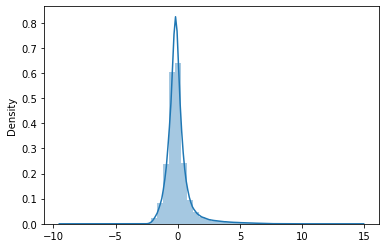

In [ ]:
v0 = data_all_4v_standard[0,:]
sns.distplot(v0)

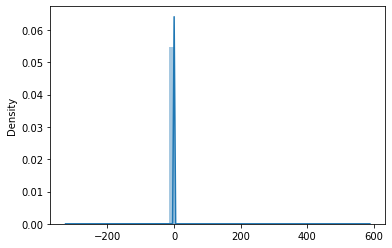

In [ ]:
v1 = data_all_4v_standard[1,:]
sns.distplot(v1)

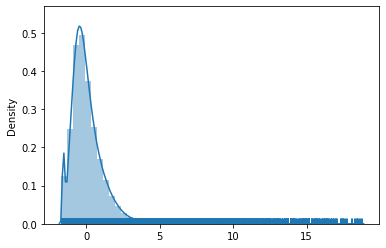

In [ ]:
v2 = data_all_4v_standard[2,:]
sns.distplot(v2, hist=True, rug=True)

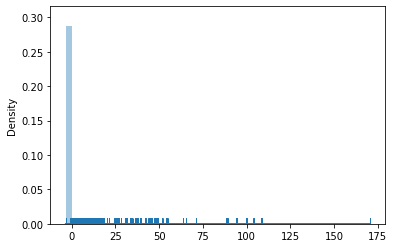

In [ ]:
v3 = data_all_4v_standard[3,:]
sns.distplot(v3, hist=True, rug=True)

### 4. get X

In [ ]:
X_list = []
Z = np.zeros((12,16))

scaler = StandardScaler()

for i in range(int(data_all_4v_standard.shape[1]/16)):
  temp = data_all_4v_standard[:,0:16]
  temp = np.vstack((temp,Z))
  temp = scaler.fit_transform(temp)
  temp = temp.reshape(16,16,1)
  data_all_4v_standard = data_all_4v_standard[:,16:]
  X_list.append(temp)

print("len X_list:",len(X_list))

data_all_4v_standard = data_all_4v_standard_copy
print("data_all_4v_standard:",data_all_4v_standard.shape)

X = np.stack(X_list,axis=0)
print("X:",X.shape)

np.savez("/content/drive/My Drive/Colab Notebooks/data/data_all_X.npz",X)

len X_list: 491141
data_all_4v_standard: (4, 7858256)
X: (491141, 16, 16, 1)


### 5. get South Sea data

In [ ]:
south_sea_li = []

data_all_copy = data_all
data_all_copy[np.isnan(data_all_copy)]=0
for i in range(int(data_all_copy.shape[1]/16)):
  temp = data_all_copy[:,0:16]
  x = temp[0,0]
  y = temp[1,0]
  if x>180:
    x = x-360 
  if 90<=x<=125 and 0<=y<=25:
    south_sea_li.append(temp)
  data_all_copy = data_all_copy[:,16:]
data_all_copy = data_all

south_sea_8v = np.hstack(south_sea_li)
south_sea_4v = south_sea_8v[2:-2,:]
print("south_sea_4v:",south_sea_4v.shape)

stat_prop(south_sea_4v)
south_sea_4v = standardization(south_sea_4v)
stat_prop(south_sea_4v)

south_sea_4v: (4, 114384)
line1:
mean: 15.107190288001497
std: 2.5812885519683593
max: 36.39695109201744
median: 14.33451316140111
min: 9.405477133648654


line2:
mean: 0.00869625858727641
std: 0.0012612776973170365
max: 0.019643673730175552
median: 0.009005599846301442
min: -0.00874855731050148


line3:
mean: 1.342558312351378
std: 1.0189148508804202
max: 31.959
median: 1.252
min: -0.21


line4:
mean: 0.034529909778872665
std: 0.1664144520773992
max: 12.39600000018254
median: 0.039400000125169754
min: -6.911399999633431


line1:
mean: -6.559773473236343e-17
std: 0.9999999999999998
max: 8.247726038912408
median: -0.29933775749758107
min: -2.208863147053051


line2:
mean: -1.4511014046856152e-16
std: 1.0
max: 8.679623183844647
median: 0.24526023070340114
min: -13.831066651607443


line3:
mean: -1.4312233032515655e-16
std: 1.0
max: 30.048086610175204
median: -0.08887721311857288
min: -1.5237370532089596


line4:
mean: 2.782934200766933e-17
std: 1.0
max: 74.28122940100396
median: 0.029264

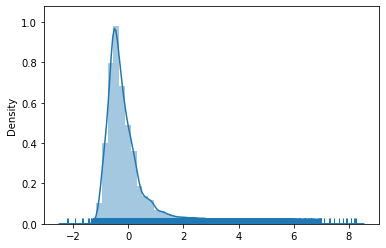

In [ ]:
v0 = south_sea_4v[0,:]
sns.distplot(v0, hist=True, rug=True)

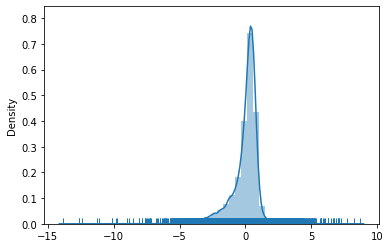

In [ ]:
v1 = south_sea_4v[1,:]
sns.distplot(v1, hist=True, rug=True)

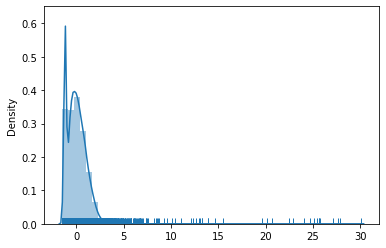

In [ ]:
v2 = south_sea_4v[2,:]
sns.distplot(v2, hist=True, rug=True)

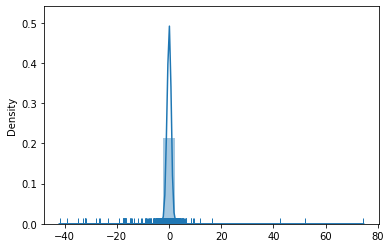

In [ ]:
v3 = south_sea_4v[3,:]
sns.distplot(v3, hist=True, rug=True)

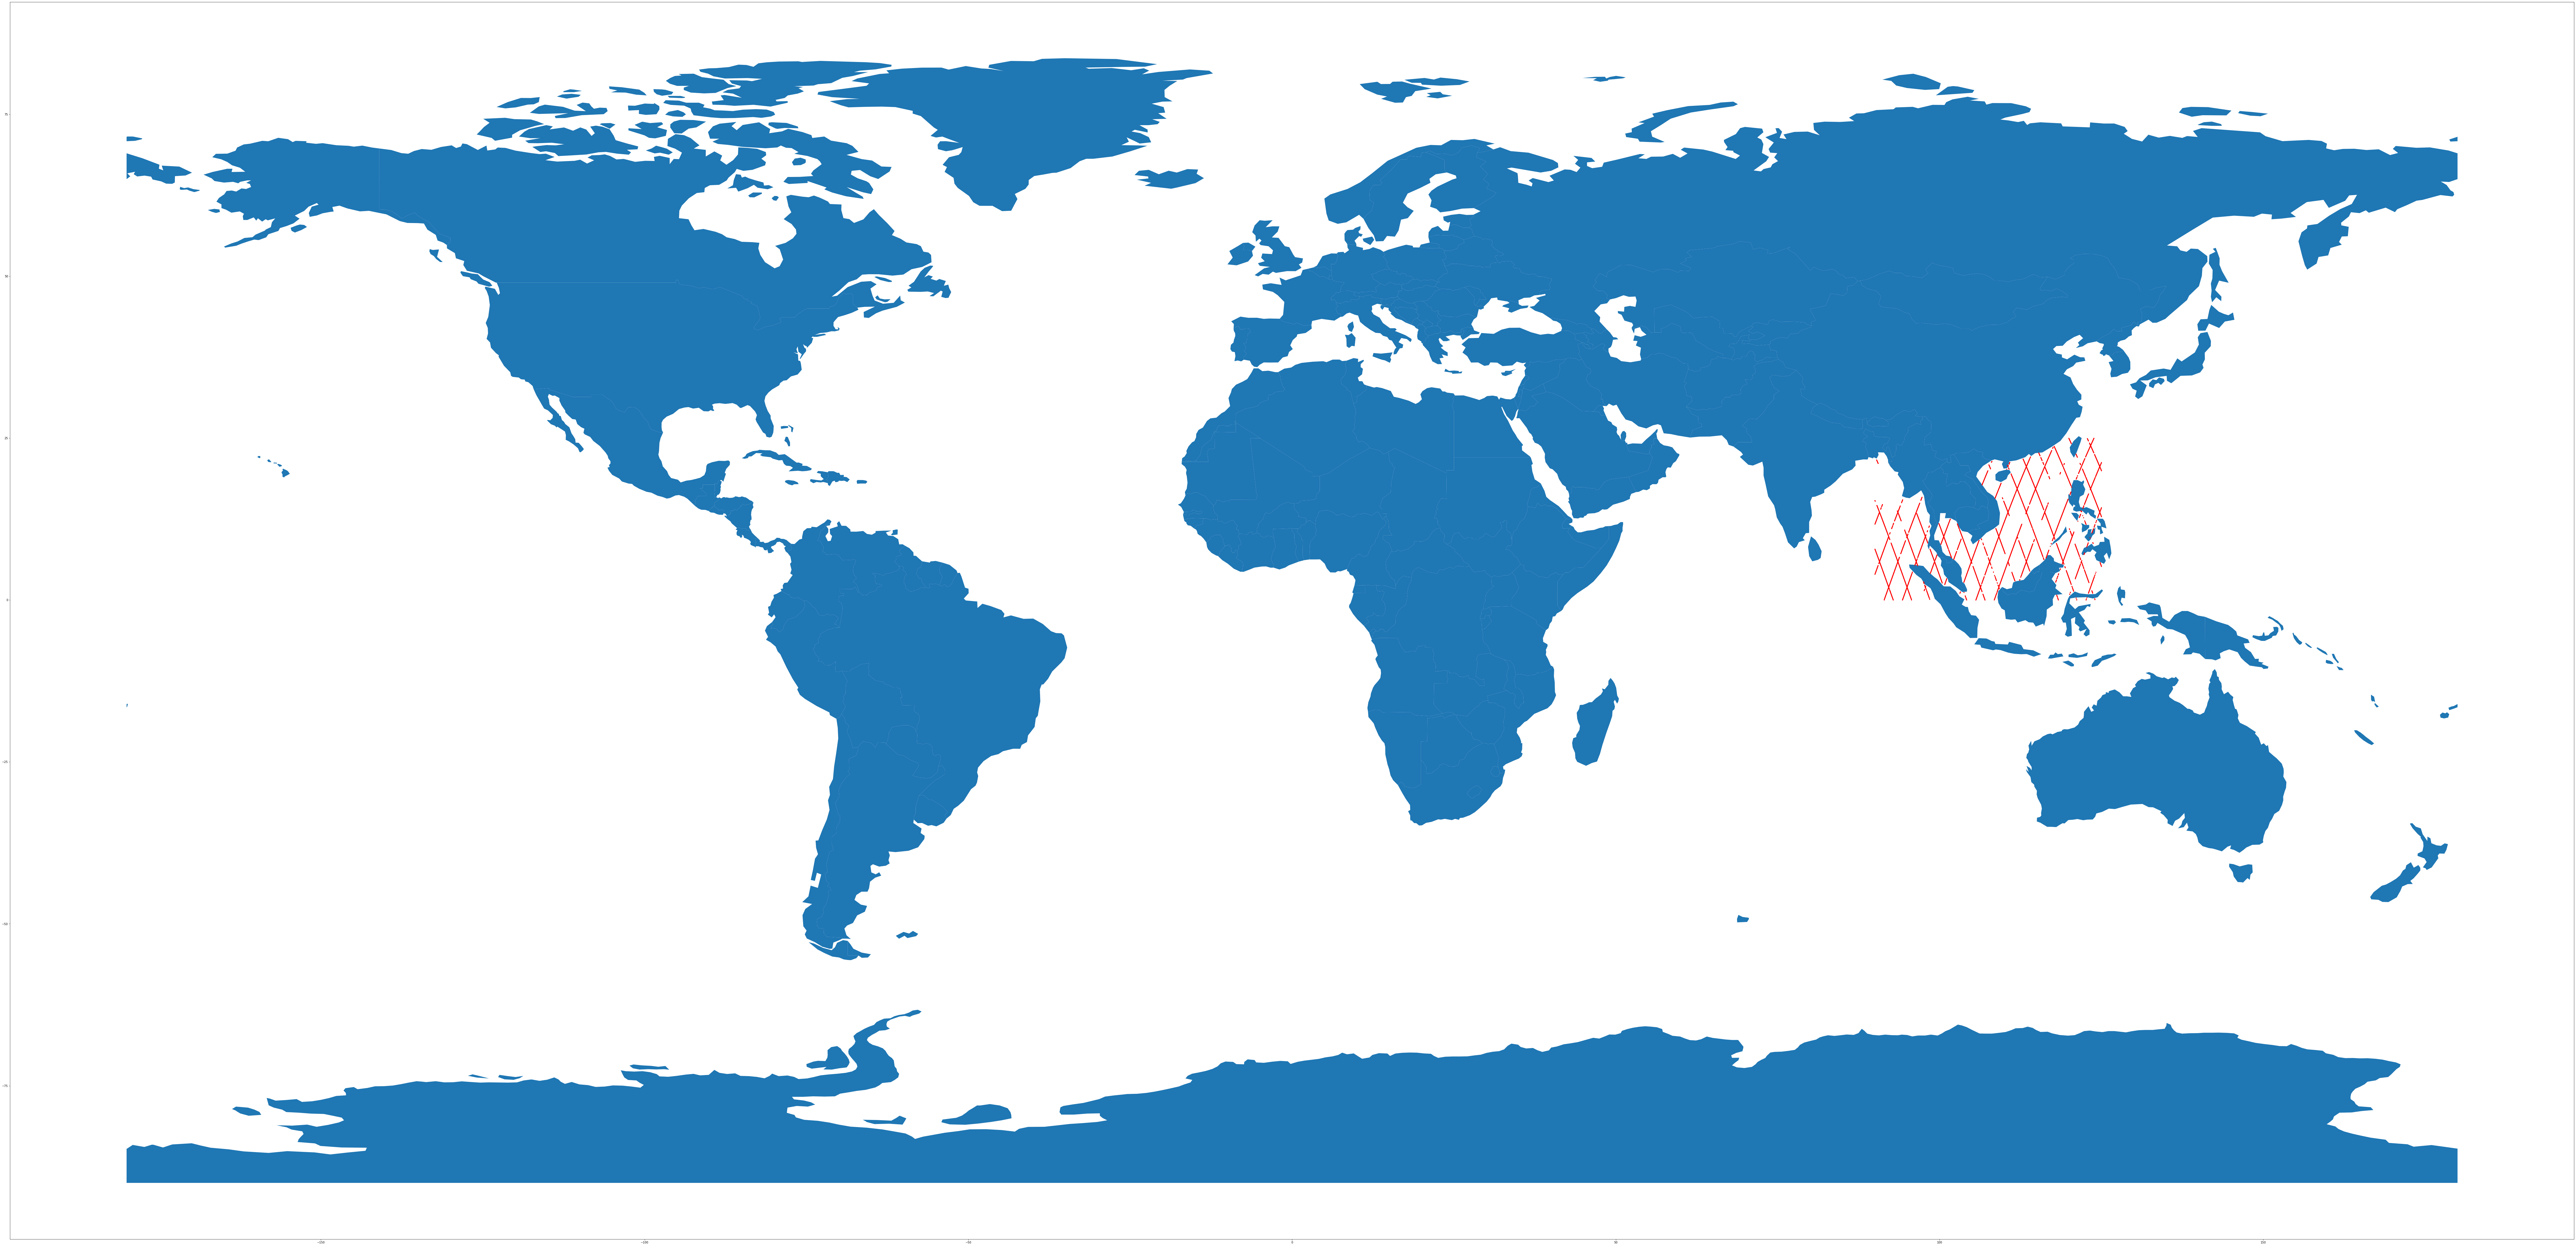

In [ ]:
data_southSea_li = []

for i in range(data_all.shape[1]):
  x = data_all[0,i]
  y = data_all[1,i]
  if x>180:
    x = x-360 
  else:
    x = x
  if 90<=x<=125 and 0<=y<=25:
    data_southSea_li.append((x,y))

df = pd.DataFrame(data_southSea_li, columns=['longitude','latitude'])

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(180, 80)), marker='o', color='red', markersize=1)

In [ ]:
south_sea_4v_copy = south_sea_4v
X_list_south_sea = []
Z = np.zeros((12,16))

scaler = StandardScaler()

for i in range(int(south_sea_4v_copy.shape[1]/16)):
  temp = south_sea_4v_copy[:,0:16]
  temp = np.vstack((temp,Z))
  temp = scaler.fit_transform(temp)
  temp = temp.reshape(16,16,1)
  south_sea_4v_copy = south_sea_4v_copy[:,16:]
  X_list_south_sea.append(temp)

print("len X_list_south_sea:",len(X_list_south_sea))

south_sea_4v_copy = south_sea_4v
print("south_sea_4v:",south_sea_4v.shape)

X_south_sea = np.stack(X_list_south_sea,axis=0)
print("X_south_sea:",X_south_sea.shape)

np.savez("/content/drive/My Drive/Colab Notebooks/data/data_all_X_south_sea.npz",X_south_sea)

len X_list_south_sea: 7149
south_sea_4v: (4, 114384)
X_south_sea: (7149, 16, 16, 1)


## Divide and concatenate 5 cycles

### 1. loading 5 cycles - data_five.npz

In [ ]:
# deal with 5 cycles
# each cycle consists of 3 data batches

data_five_li = []
for k in range(5):  
  data_i = []
  cnt = 1
  for j in range(3):
    path_all = "/content/drive/My Drive/Colab Notebooks/"+str(125+k)+"_GenSample/"+str(j+1)+"/"
    inputfilenames = os.listdir(path_all)
    for files in inputfilenames:
      print(str(125+k)+"_GenSample/"+str(j+1)+"/"+"No."+str(cnt))
      cnt=cnt+1
      readpath = path_all + files
      intemp = scio.loadmat(readpath)
      intemp1 = intemp['inputs']
      i=0
      while i<=intemp1.shape[1]:
        cur = intemp1[:,i:i+16]
        if np.sum(cur[6,:])==16 and np.sum(cur[7,:])==16:
          cur[np.isnan(cur)]=0
          data_i.append(cur)
        i=i+16
  data_five_li.append(data_i)

125_GenSample/1/No.1
125_GenSample/1/No.2
125_GenSample/1/No.3
125_GenSample/1/No.4
125_GenSample/1/No.5
125_GenSample/1/No.6
125_GenSample/1/No.7
125_GenSample/1/No.8
125_GenSample/1/No.9
125_GenSample/1/No.10
125_GenSample/1/No.11
125_GenSample/1/No.12
125_GenSample/1/No.13
125_GenSample/1/No.14
125_GenSample/1/No.15
125_GenSample/1/No.16
125_GenSample/1/No.17
125_GenSample/1/No.18
125_GenSample/1/No.19
125_GenSample/1/No.20
125_GenSample/1/No.21
125_GenSample/1/No.22
125_GenSample/1/No.23
125_GenSample/1/No.24
125_GenSample/1/No.25
125_GenSample/1/No.26
125_GenSample/1/No.27
125_GenSample/1/No.28
125_GenSample/1/No.29
125_GenSample/1/No.30
125_GenSample/1/No.31
125_GenSample/1/No.32
125_GenSample/1/No.33
125_GenSample/1/No.34
125_GenSample/1/No.35
125_GenSample/1/No.36
125_GenSample/1/No.37
125_GenSample/1/No.38
125_GenSample/1/No.39
125_GenSample/1/No.40
125_GenSample/1/No.41
125_GenSample/1/No.42
125_GenSample/1/No.43
125_GenSample/1/No.44
125_GenSample/1/No.45
125_GenSample/1/No.

In [ ]:
# len(data_five_li)
print(len(data_five_li[0]))
print(len(data_five_li[1]))
print(len(data_five_li[2]))

d0 = np.hstack(data_five_li[0])
print("d0:",d0.shape)
d1 = np.hstack(data_five_li[1])
print("d1:",d1.shape)
d2 = np.hstack(data_five_li[2])
print("d2:",d2.shape)
d3 = np.hstack(data_five_li[3])
print("d3:",d3.shape)
d4 = np.hstack(data_five_li[4])
print("d4:",d4.shape)


d0: (8, 7858256)
d1: (8, 7861600)
d2: (8, 7748368)
d3: (8, 7779648)
d4: (8, 7776672)


In [ ]:
data_five = np.hstack([d0,d1,d2,d3,d4])
print("data_five:",data_five.shape)
np.savez("/content/drive/My Drive/Colab Notebooks/data_five.npz",data_five)

data_five: (8, 39024544)


### 2. standardization

In [ ]:
data_five = np.load("/content/drive/My Drive/Colab Notebooks/data/data_five.npz")
data_five = data_five["arr_0"]
print("data_five:",data_five.shape)

# data_five_copy = data_five
# print("data_five_copy:",data_five_copy.shape)

# data_five_4v = data_five[2:-2,:]
# data_five_4v[np.isnan(data_five_4v)]=0
# print("data_five_4v:",data_five_4v.shape)

# data_five_4v_copy = data_five_4v
# print("data_five_4v_copy:",data_five_4v_copy.shape)

data_five: (8, 39024544)


In [ ]:
def stat_prop(data,show_mean=True,show_std=True):
  for i in range(data.shape[0]):
    print("line{}:".format(i+1))
    if show_mean==True:
      print("mean:",np.mean(data[i,:]))
    if show_std==True:
      print("std:",np.std(data[i,:]))
    print("max:",np.max(data[i,:]))
    print("median:",np.median(data[i,:]))
    print("min:",np.min(data[i,:]))
    print("\n")

# stat_prop(data_five_4v)
stat_prop(data_five)

line1:
mean: 196.3205292260726
std: 98.74921792372803
max: 359.99999399999996
median: 201.07537499999998
min: 0.0


line2:
mean: -7.970652132123772
std: 35.7672914124818
max: 66.150587
median: -11.3002495
min: -66.151111


line3:
mean: 14.084479590496164
std: 2.0425465308345614
max: 44.98787313742362
median: 13.784327790914926
min: -18.087031269033933


line4:
mean: 0.00868789783919867
std: 0.00867977726104059
max: 6.892332469661845
median: 0.008893933752911705
min: -3.822848546350951


line5:
mean: 2.5434509158646437
std: 1.573263411114132
max: 32.766
median: 2.25
min: -0.211


line6:
mean: 0.9381902634331186
std: 28.3138959971094
max: 5076.709200000158
median: 0.031100000021979213
min: -79.66309999977238


line7:
mean: 1.0
std: 0.0
max: 1.0
median: 1.0
min: 1.0


line8:
mean: 1.0
std: 0.0
max: 1.0
median: 1.0
min: 1.0




In [ ]:
def standardization(data):
  data_li = []
  for i in range(data.shape[0]):
    vi = data[i,:]
    mean = np.mean(vi)
    deviation = np.std(vi)
    vi = (vi-mean)/deviation
    data_li.append(vi)
  data = np.vstack(data_li)
  return data

# data_five_4v_standard = standardization(data_five_4v)
# stat_prop(data_five_4v_standard)
# print("data_five_4v_standard:",data_five_4v_standard.shape)

stat_prop(standardization(data_five[2:-2,:]))

line1:
mean: -2.2098246904505745e-14
std: 0.9999999999999989
max: 15.129835761587609
median: -0.1469497977402745
min: -15.750686887111051


line2:
mean: 1.8039777471589184e-15
std: 1.000000000000002
max: 793.0669606834346
median: 0.023737465549701596
min: -441.4325770072583


line3:
mean: -1.3479731289664513e-15
std: 0.9999999999999984
max: 19.21010103624845
median: -0.18652370212870562
min: -1.750788136561337


line4:
mean: 7.86778917405701e-17
std: 0.9999999999999988
max: 179.26784114255827
median: -0.032036928563407355
min: -2.8467043274946753




### 3. visualization - collapse

In [ ]:
# v0 = data_five_4v_standard[0,:]
sns.distplot(data_five[0,:], hist=True, rug=True)

In [ ]:
v1 = data_five_4v_standard[1,:]
sns.distplot(v1, hist=True, rug=True)

In [ ]:
v2 = data_five_4v_standard[2,:]
sns.distplot(v2, hist=True, rug=True)

In [ ]:
v3 = data_five_4v_standard[3,:]
sns.distplot(v3, hist=True, rug=True)

### 4. get X - data_five_X.npz [collapse]

In [ ]:
# X_list = []
# Z = np.zeros((12,16))

# scaler = StandardScaler()

# data_five_4v_standard_copy = data_five_4v_standard
# for i in range(int(data_five_4v_standard_copy.shape[1]/16)):
#   temp = data_five_4v_standard_copy[:,0:16]
#   temp = np.vstack((temp,Z))
#   temp = scaler.fit_transform(temp)
#   temp = temp.reshape(16,16,1)
#   data_five_4v_standard_copy = data_five_4v_standard_copy[:,16:]
#   X_list.append(temp)

# print("len X_list:",len(X_list))
# print("data_five_4v_standard:",data_five_4v_standard.shape)

# X = np.stack(X_list,axis=0)
# print("X:",X.shape)

# np.savez("/content/drive/My Drive/Colab Notebooks/data/data_five_X.npz",X)

## localization

In [7]:
# data preparation

# 1. all data

# X = np.load("/content/drive/My Drive/Colab Notebooks/data/data_all_X.npz")
# X = X["arr_0"]
# print("X:",X.shape)

# data_all = np.load("/content/drive/My Drive/Colab Notebooks/data_all.npz")
# data_all = data_all["arr_0"]
# print("data_all:",data_all.shape)

# 2. south sea data

# X = np.load("/content/drive/My Drive/Colab Notebooks/data/data_all_X_south_sea.npz")
# X = X["arr_0"]
# print("X:",X.shape)

# print("south_sea_8v:",south_sea_8v.shape)

# 3. 5 cycles data

X = np.load("/content/drive/My Drive/Colab Notebooks/data/data_five_X.npz")
X = X["arr_0"]
print("X:",X.shape)

data_five = np.load("/content/drive/My Drive/Colab Notebooks/data/data_five.npz")
data_five = data_five["arr_0"]
print("data_five:",data_five.shape)

X: (2439034, 16, 16, 1)
data_five: (8, 39024544)


In [8]:
# predict
# ,custom_objects={"mySigmoid":mySigmoid}
# model = load_model("/content/drive/My Drive/Colab Notebooks/ResNet_cls.h5")
model = load_model("/content/drive/My Drive/Colab Notebooks/BoTNet.h5")
X = X.reshape(X.shape[0],16,16,1)
y = model.predict(X)
y.shape

(2439034, 17)

In [9]:
# inspect predicted data y_cls

# set threshold
y_pred = []
for i in range(y.shape[0]):
  if np.max(y[i])<0.95:
    y_pred.append(0)
  else:
    y_pred.append(np.argmax(y[i]))

print("max:",np.max(y_pred))
print("min:",np.min(y_pred))
print("non zero:",np.count_nonzero(y_pred))
print("total:", len(y_pred))

# print("y_pred:",y_pred.shape)
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_pred_five.txt",y_pred)

max: 15
min: 0
non zero: 25613
total: 2439034


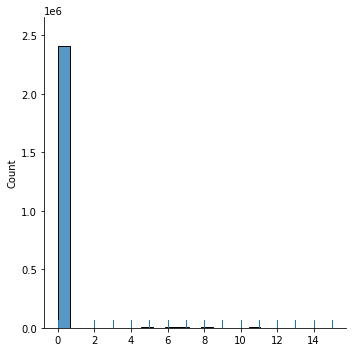

In [10]:
sns.displot(y_pred,rug=True)

In [11]:
def visualize(y_pred,data_all):
  if len(y_pred)!=int(data_all.shape[1]/16):
    print("y_pred != data_all.shape[1]/16")
    return 0
  location = []
  for i in range(len(y_pred)):
    if y_pred[i]!=0:
      x = data_all[0,i*16+y_pred[i]-1]
      y = data_all[1,i*16+y_pred[i]-1]

      if x>180:
        x = x-360

      # print(x,y)
      location.append((x,y))

  df = pd.DataFrame(location, columns=['longitude','latitude'])

  df.to_csv("/content/drive/My Drive/Colab Notebooks/location_five.csv")

  # df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/location_all.csv")

  geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
  gdf = GeoDataFrame(df, geometry=geometry)   

  #this is a simple map that goes with geopandas
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  gdf.plot(ax=world.plot(figsize=(180, 80)), marker='o', color='red', markersize=50)

visualize(y_pred,data_five)

Output hidden; open in https://colab.research.google.com to view.

### check west pacific IW positive data

In [ ]:
index_iw = []
for i in range(len(y_pred_all)):
  if y_pred_all[i]!=0:
    index_iw.append(i)
print(len(index_iw))
print(index_iw)

186930
[0, 1, 2, 3, 22, 27, 30, 31, 32, 33, 37, 39, 40, 43, 44, 46, 51, 141, 142, 154, 157, 160, 161, 164, 165, 166, 170, 172, 173, 174, 181, 188, 192, 193, 194, 198, 205, 225, 248, 249, 255, 258, 261, 262, 274, 284, 287, 288, 291, 292, 300, 301, 303, 304, 306, 311, 323, 324, 325, 327, 328, 329, 331, 332, 337, 340, 343, 347, 356, 362, 400, 420, 468, 480, 494, 497, 500, 503, 504, 516, 520, 524, 525, 535, 539, 540, 545, 549, 553, 554, 555, 556, 559, 560, 561, 562, 563, 596, 600, 605, 703, 706, 709, 710, 711, 712, 713, 714, 715, 716, 717, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 732, 734, 735, 736, 737, 738, 740, 741, 742, 744, 745, 746, 747, 749, 750, 751, 752, 754, 755, 758, 759, 760, 762, 763, 764, 765, 766, 767, 768, 769, 770, 772, 773, 774, 775, 776, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 792, 793, 795, 796, 841, 847, 849, 853, 862, 903, 918, 934, 938, 944, 948, 956, 966, 968, 974, 975, 978, 980, 988, 990, 994, 1005, 1007, 1008, 1010, 1014, 1017, 10

## classification

In [ ]:
X = np.load("/content/drive/My Drive/Colab Notebooks/data/data_all_X.npz")
X = X["arr_0"]
print("X:",X.shape)

data_all = np.load("/content/drive/My Drive/Colab Notebooks/data_all.npz")
data_all = data_all["arr_0"]
print("data_all:",data_all.shape)

X: (491137, 16, 16, 1)
data_all: (8, 7858208)


In [ ]:
model = load_model("/content/drive/My Drive/Colab Notebooks/CNN_cls.h5")

y_pred_cls = model.predict(X)

In [ ]:
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_pred_cls.txt",y_pred_cls)

In [ ]:
def inspect_y(y_pred):
  y_pred = np.around(y_pred)
  y_pred = y_pred.astype(int)
  print("max:",np.max(y_pred))
  print("min:",np.min(y_pred))
  print("non zero:",np.count_nonzero(y_pred))
  print("len:",len(y_pred))
  return y_pred

y_pred_cls = inspect_y(y_pred_cls)
print("y_pred_cls:",y_pred_cls.shape)
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_pred_cls.txt",y_pred_cls)

max: 1
min: 0
non zero: 7062
len: 491137
y_pred_cls: (491137, 1)


In [ ]:
def visualize_cls(y_pred,data_all):
  location = []
  for i in range(len(y_pred)):
    if y_pred[i]!=0:
      x = data_all[0,i*16+y_pred[i]-1]
      y = data_all[1,i*16+y_pred[i]-1]

      if x>180:
        x = x[0]-360 
      else:
        x = x[0]
      y = y[0]
      print(x,y)
      location.append((x,y))

  df = pd.DataFrame(location, columns=['longitude','latitude'])

  df.to_csv("/content/drive/My Drive/Colab Notebooks/location_all_cls.csv")

  df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/location_all_cls.csv")

  geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
  gdf = GeoDataFrame(df, geometry=geometry)   

  #this is a simple map that goes with geopandas
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
  gdf.plot(ax=world.plot(figsize=(180, 80)), marker='o', color='red', markersize=10)

visualize_cls(y_pred_cls,data_all)

Output hidden; open in https://colab.research.google.com to view.